# IN4391 Distributed Systems - HugeTable
This notebook contains the analysis scripts for the experimental data we obtained with HugeTable.

In [2]:
import json
import glob

import numpy as np
import pandas as pd

import seaborn as sns; sns.set()
import matplotlib.pyplot as plt

In [32]:
df = pd.DataFrame(columns = ["trial", "duration", "load-balancer", "num-servers", "throughput", "timings"])
for file in glob.glob('data/experiment-write-*.json'):
    with open(file, 'r') as fd:
        res = json.load(fd)
        df = pd.concat([df, pd.DataFrame(res)])

,trial,duration,load-balancer,num-servers,throughput,timings
0,1,44197,min-tablets,4,2262.597009,"[78, 23, 18, 22, 18, 19, 24, 17, 14, 12, 11, 1..."
1,2,38733,min-tablets,4,2581.777812,"[17, 3, 4, 3, 3, 5, 3, 3, 3, 2, 3, 2, 2, 2, 2,..."
2,3,42127,min-tablets,4,2373.774539,"[14, 3, 8, 3, 3, 5, 3, 2, 2, 2, 2, 2, 2, 1, 2,..."
3,4,37876,min-tablets,4,2640.194318,"[21, 2, 2, 1, 2, 2, 1, 2, 2, 1, 2, 1, 2, 4, 1,..."
0,1,44118,round-robin,1,2266.648533,"[58, 22, 19, 17, 15, 18, 28, 13, 18, 13, 11, 1..."
1,2,42553,round-robin,1,2350.010575,"[12, 8, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 2, 3, 2,..."
2,3,42364,round-robin,1,2360.494760,"[29, 5, 2, 3, 2, 3, 2, 3, 2, 2, 2, 1, 2, 2, 2,..."
3,4,43692,round-robin,1,2288.748512,"[35, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2,..."
0,1,43374,min-tablets,2,2305.528658,"[55, 28, 20, 17, 26, 13, 18, 15, 13, 15, 12, 1..."
1,2,42174,min-tablets,2,2371.129132,"[13, 4, 3, 3, 4, 3, 3, 2, 3, 2, 2, 2, 2, 3, 2,..."


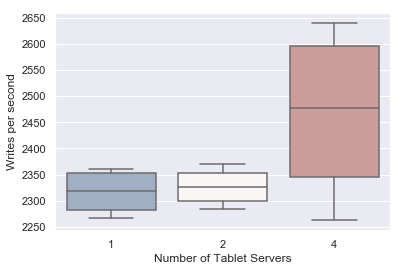

In [37]:
ax = sns.boxplot(x="num-servers", y="throughput", data=df,
            whis="range", palette="vlag")
ax.set_ylabel("Writes per second")
ax.set_xlabel("Number of Tablet Servers")

plt.savefig('throughput-write.pdf')

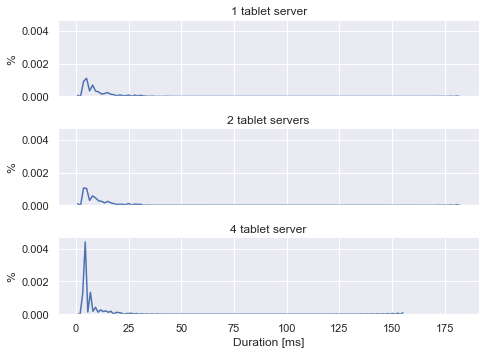

In [43]:
g = sns.FacetGrid(df.explode('timings'), row="num-servers",
                  height=1.7, aspect=4,)
g.map(sns.kdeplot, "timings");
g.axes[0,0].set_ylabel('%')
g.axes[0,0].set_title('1 tablet server')
g.axes[1,0].set_ylabel('%')
g.axes[1,0].set_title('2 tablet servers')
g.axes[2,0].set_ylabel('%')
g.axes[2,0].set_title('4 tablet server')
g.axes[2,0].set_xlabel('Duration [ms]');
plt.savefig('latency-write.pdf');

In [ ]:
df = pd.DataFrame(columns = ["trial", "duration", "load-balancer", "num-servers", "throughput", "timings"])
for file in glob.glob('data/experiment-read-*.json'):
    with open(file, 'r') as fd:
        res = json.load(fd)
        df = pd.concat([df, pd.DataFrame(res)])

In [ ]:
ax = sns.boxplot(x="num-servers", y="throughput", data=df,
            whis="range", palette="vlag")
ax.set_ylabel("Reads per second")
ax.set_xlabel("Number of Tablet Servers")

plt.savefig('throughput-read.pdf')

In [ ]:
g = sns.FacetGrid(df.explode('timings'), row="num-servers",
                  height=1.7, aspect=4,)
g.map(sns.kdeplot, "timings");
g.axes[0,0].set_ylabel('%')
g.axes[0,0].set_title('1 tablet server')
g.axes[1,0].set_ylabel('%')
g.axes[1,0].set_title('2 tablet servers')
g.axes[2,0].set_ylabel('%')
g.axes[2,0].set_title('4 tablet server')
g.axes[2,0].set_xlabel('Duration [ms]');
plt.savefig('latency-read.pdf');